In [1]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [87]:
data_path = '/Users/aichah/Desktop/TLI/data/new_output'
save_path = '/Users/aichah/Desktop/TLI/data/new_output/fig3/'
# viloin_plots_to_do = ['volume','density_3D', 'area', 'convexity_3D',
#                         'circularity','AP_spread','DV_spread',
#                         'surface_area','asymmetry']
# line_plots_to_do = ['PCA_xy','PCA_shift_centroid']
plot_cols = ['volume', 'net_area', 'area',
                'AP_spread', 'DV_spread',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis', 'cen_EP_angle',
                'asymmetry', 'x_asymmetry', 'y_asymmetry', 'PC1_asymmetry', 'PC2_asymmetry']
plot_2D_cols = [('cen_EP_X','cen_EP_Y')]

In [2]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}

In [14]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [15]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/Users/aichah/Desktop/TLI/data/new_output/220209_P36_N1_sC.csv', '/Users/aichah/Desktop/TLI/data/new_output/220127_P36_N1_sD.csv', '/Users/aichah/Desktop/TLI/data/new_output/211121_P36.5_N3_sC.csv', '/Users/aichah/Desktop/TLI/data/new_output/211121_P36.5_N2_sA.csv', '/Users/aichah/Desktop/TLI/data/new_output/211121_P36.5_N1_sA.csv']


In [52]:
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)
neu_types

,neu_type,neu_name
0,C,220209_P36_N1_sC
1,D,220127_P36_N1_sD
2,C,211121_P36.5_N3_sC
3,A,211121_P36.5_N2_sA
4,A,211121_P36.5_N1_sA
5,C,211114_P36_N3_sC
6,A,211114_P36_N2_sA
7,A,211114_P36_N1_sA
8,A,211113_P36_N2_sA
9,C,211113_P36_N1_sC


<ipython-input-85-e2496ed02af9>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


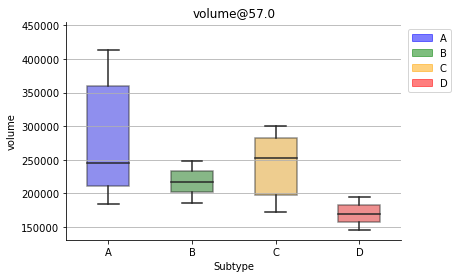

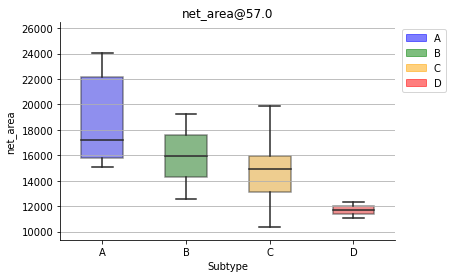

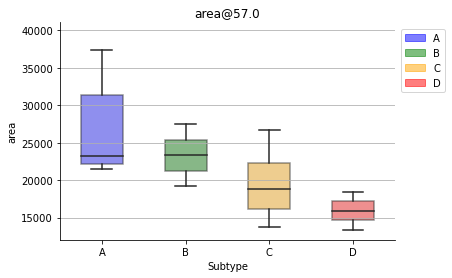

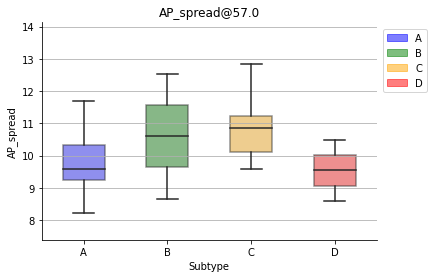

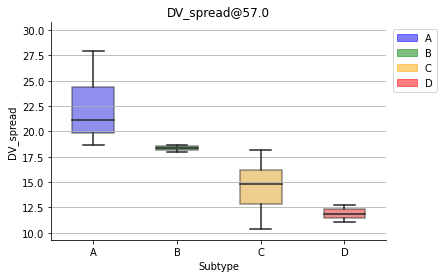

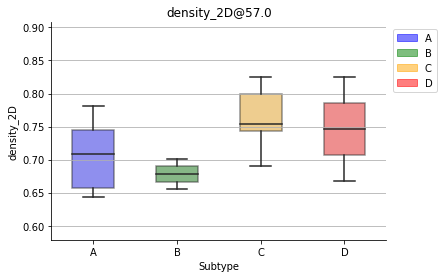

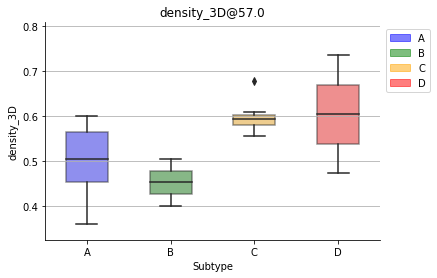

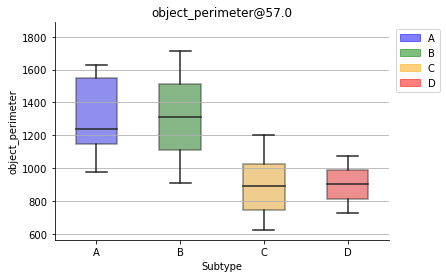

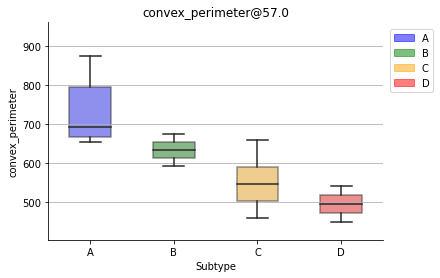

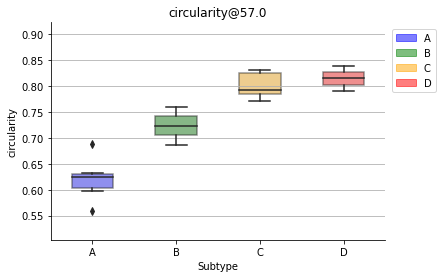

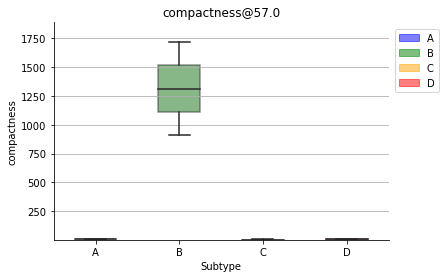

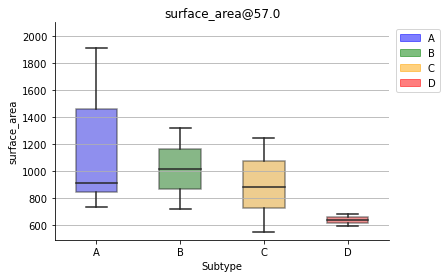

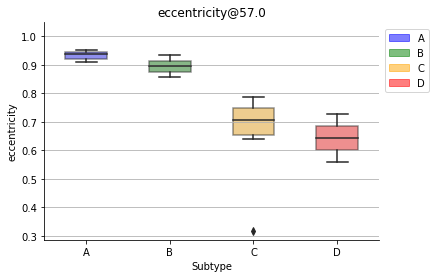

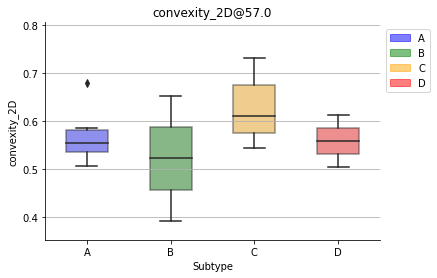

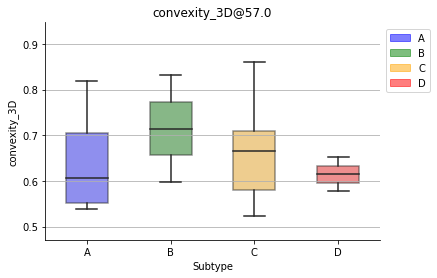

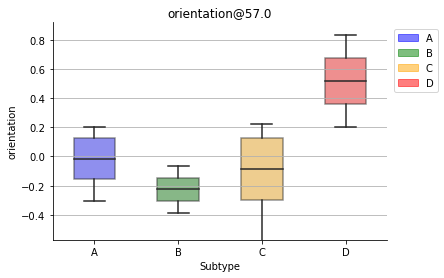

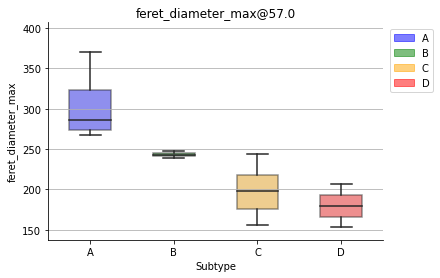

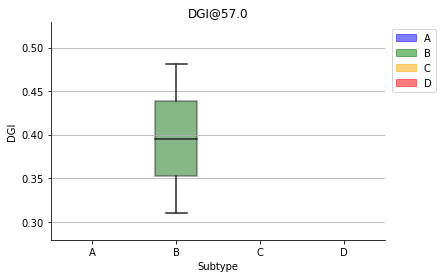

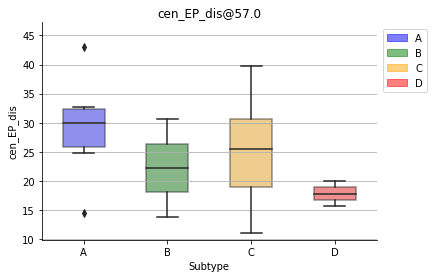

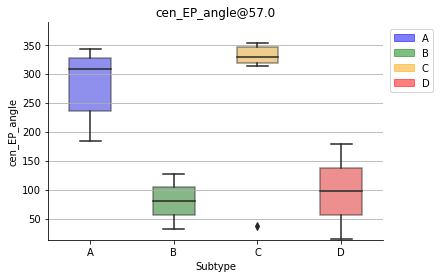

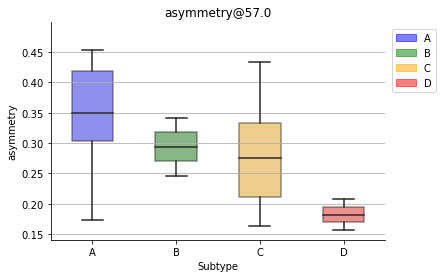

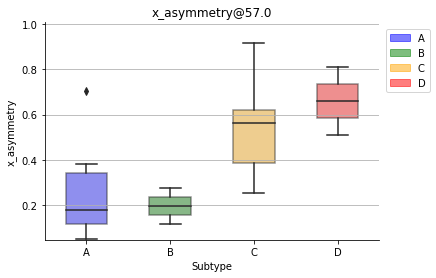

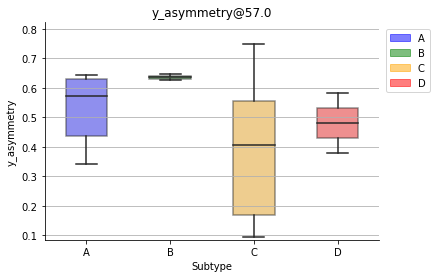

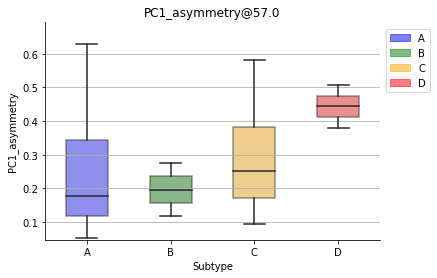

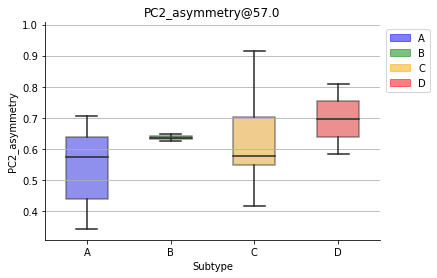

In [85]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]
    del collective_results
    neu_names = list(y_vals.keys()[1:])
    neu_types = [neu.split('_s')[1][0] for neu in neu_names]
    val_col_name = plot_col+'@'+str(y_vals['timepoint'])
    plot_df = {'neu_name':neu_names, 'subtype':neu_types, 
                val_col_name:y_vals[1:]}
    plot_df = pd.DataFrame(plot_df)
    # plot_df.index = range(len(neu_names))
    fig, ax = plt.subplots(1)
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=plot_df.subtype, y=plot_df[val_col_name], 
                order=plt_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)
    ax.set_title(val_col_name)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = val_col_name+'hAPF.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)


In [99]:
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results_X = pd.DataFrame(timepoints)
    collective_results_Y = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[0]])
        temp_df = temp_df.rename(columns={plot_col[0]:neu_name})
        collective_results_X = pd.merge(collective_results_X, temp_df, on='timepoint')
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results_Y = pd.merge(collective_results_Y, temp_df, on='timepoint')
    x_vals = collective_results_X.loc[Plot_t]
    y_vals = collective_results_Y.loc[Plot_t]
    

In [101]:
x_vals

timepoint                57.000000
220209_P36_N1_sC.cs      -3.134760
220127_P36_N1_sD.cs       0.490055
211121_P36.5_N3_sC.cs    -8.058154
211121_P36.5_N2_sA.cs   -13.106952
211121_P36.5_N1_sA.cs    -1.070307
211114_P36_N3_sC.cs     -11.851199
211114_P36_N2_sA.cs     -25.582697
211114_P36_N1_sA.cs     -13.037019
211113_P36_N2_sA.cs     -15.429838
211113_P36_N1_sC.cs     -18.080996
211107_P36_N3_sD.cs       4.042537
211107_P36_N2_sC.cs      10.144854
211107_P36_N1_sB.cs      10.990372
211104_P36_N3_sC.cs     -12.888835
211104_P36_N2_sA.cs     -21.893648
211104_P36_N1_sC.cs      -5.051480
211011_P37_N1_sB.cs      16.128928
Name: 80, dtype: float64

In [94]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]

In [95]:
y_vals

timepoint                57.000000
220209_P36_N1_sC.cs       0.561442
220127_P36_N1_sD.cs       0.581982
211121_P36.5_N3_sC.cs     0.577430
211121_P36.5_N2_sA.cs     0.643399
211121_P36.5_N1_sA.cs     0.704988
211114_P36_N3_sC.cs       0.417709
211114_P36_N2_sA.cs       0.408015
211114_P36_N1_sA.cs       0.341624
211113_P36_N2_sA.cs       0.526159
211113_P36_N1_sC.cs       0.661404
211107_P36_N3_sD.cs       0.809551
211107_P36_N2_sC.cs       0.746825
211107_P36_N1_sB.cs       0.624724
211104_P36_N3_sC.cs       0.533741
211104_P36_N2_sA.cs       0.621363
211104_P36_N1_sC.cs       0.915525
211011_P37_N1_sB.cs       0.647066
Name: 80, dtype: float64

In [ ]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

In [35]:
collective_results.head()

,timepoint,220209_P36_N1_sC.cs,220127_P36_N1_sD.cs,211121_P36.5_N3_sC.cs,211121_P36.5_N2_sA.cs,211121_P36.5_N1_sA.cs,211114_P36_N3_sC.cs,211114_P36_N2_sA.cs,211114_P36_N1_sA.cs,211113_P36_N2_sA.cs,211113_P36_N1_sC.cs,211107_P36_N3_sD.cs,211107_P36_N2_sC.cs,211107_P36_N1_sB.cs,211104_P36_N3_sC.cs,211104_P36_N2_sA.cs,211104_P36_N1_sC.cs,211011_P37_N1_sB.cs
0,37.00,78916,73491,116952,130529,95313,107071,151469,149726,127665,110070,132449,70942,181889,76014,101286,136287,131661
1,37.25,83982,66185,112677,115766,96316,94970,145275,152121,119660,116364,128381,76129,203675,114303,140596,172504,152362
2,37.50,93741,72354,117705,127215,102673,99258,132612,152172,116568,116620,125947,78334,195900,102836,135014,164678,149077
3,37.75,88093,76553,120615,126959,91071,98647,131295,158076,112778,107532,135505,87855,191800,116692,133455,156393,165857
4,38.00,80822,69393,114979,118545,97465,105399,129527,122889,110119,104940,124646,92852,181558,120719,132940,150424,160854


In [74]:

plot_df.head()

,neu_name,subtype,volume@57.0
0,220209_P36_N1_sC.cs,C,222150.0
1,220127_P36_N1_sD.cs,D,145196.0
2,211121_P36.5_N3_sC.cs,C,252156.0
3,211121_P36.5_N2_sA.cs,A,238911.0
4,211121_P36.5_N1_sA.cs,A,184278.0


<AxesSubplot:xlabel='subtype', ylabel='volume@57.0'>

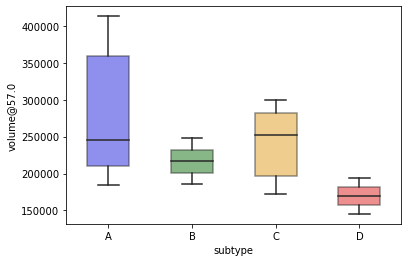

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [5]:
results_df = pd.read_csv(data_path, index_col=0)

In [6]:
results_df.head()

,neuron,subtype,entry_point,volume,net_area,area,AP_spread,DV_spread,density_2D,density_3D,...,yP_scale,yP_angle,yP_xy,yN_weight,yN_scale,yN_angle,yN_xy,PCA_angle,PCA_xy,PCA_shift_centroid
0,T4-02,A,[ 11 347 337],108849,14980,27964,146,267,0.535689,0.363586,...,146.971715,-99.687679,"(-0.0964996688972741, 0.5652782239136788)",0.003842,-112.013844,-279.687679,"(0.07241650660220049, -0.4242032610257114)",-9.687679,"(39.34590188342817, 6.716810136304233)","(4.393954512209415, 21.89753021929927)"
1,T4-03,D,[ 22 651 367],108692,17030,38753,159,336,0.439450,0.219961,...,91.193838,-86.747302,"(0.5951072459657829, 10.471458819771144)",0.526327,-246.534458,-266.747302,"(-7.3624309385526585, -129.54873749074792)",-266.747302,"(-7.3624309385526585, -129.54873749074792)","(-83.91317987304318, -6.3473051991717675)"
2,T4-04,B,[ 18 569 625],186473,21180,43348,167,352,0.488604,0.289973,...,146.007427,-91.955341,"(-0.28542086865273697, 8.360211519175595)",0.074719,-205.685251,-271.955341,"(0.5243854677985635, -15.35968077271772)",-181.955341,"(-104.21433415715065, -3.557917848486889)","(-16.921708624837933, -47.9081530700065)"
3,T4-05,D,[ 10 666 452],170394,22127,51284,207,367,0.431460,0.215020,...,95.363716,-81.309100,"(1.613308582059392, 10.554229281046819)",0.549541,-282.230528,-261.309100,"(-23.435768901607982, -153.31628500324416)",-261.309100,"(-23.435768901607982, -153.31628500324416)","(-97.30143836713606, -15.992372805863232)"
4,T4-06,D,[ 15 441 368],168232,20893,43249,155,367,0.483086,0.240248,...,106.038768,-80.571119,"(2.1034614700853624, 12.66635343034258)",0.467388,-259.251018,-260.571119,"(-19.850616474093734, -119.53388623792972)",-260.571119,"(-19.850616474093734, -119.53388623792972)","(-82.37215767197284, 0.870859272895592)"


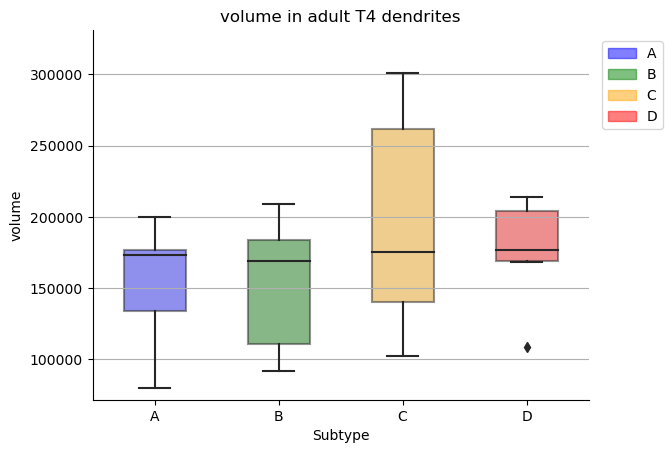

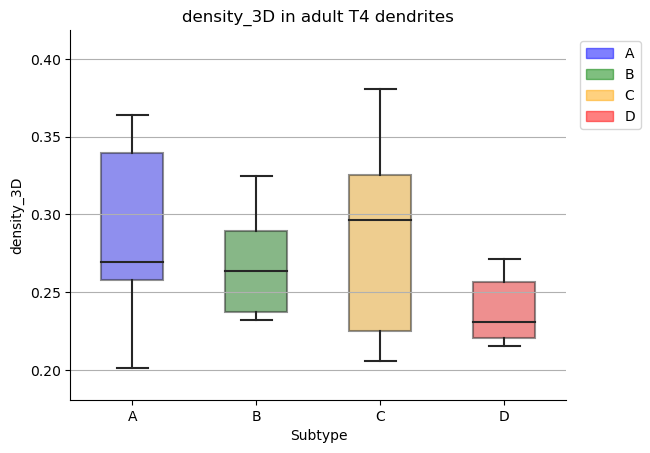

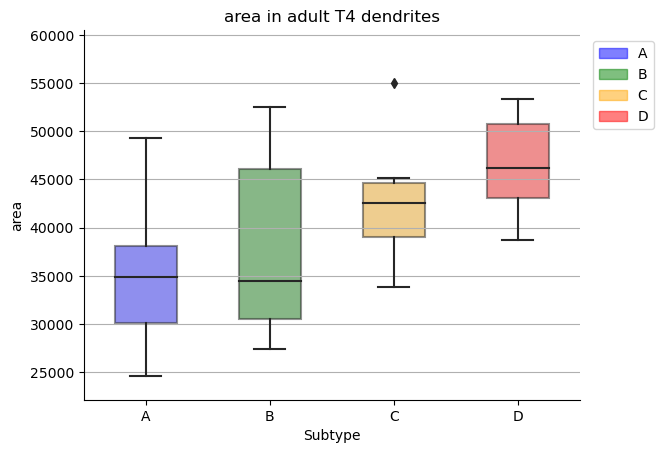

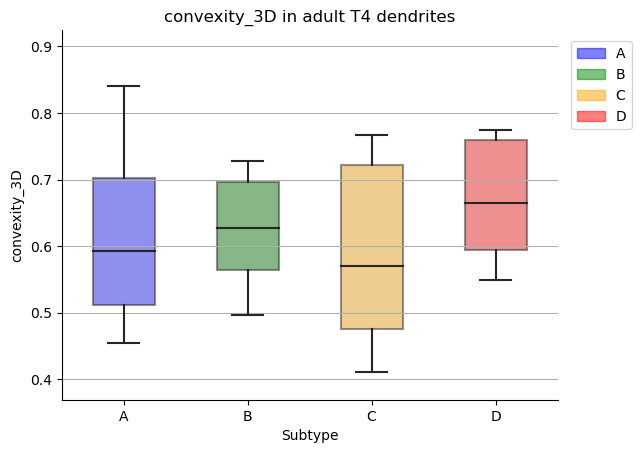

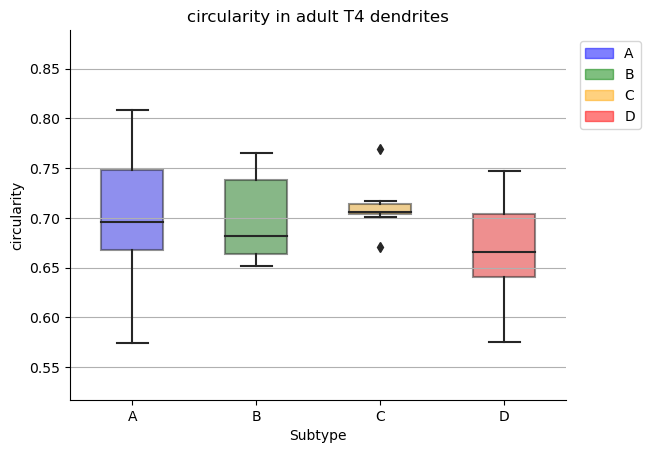

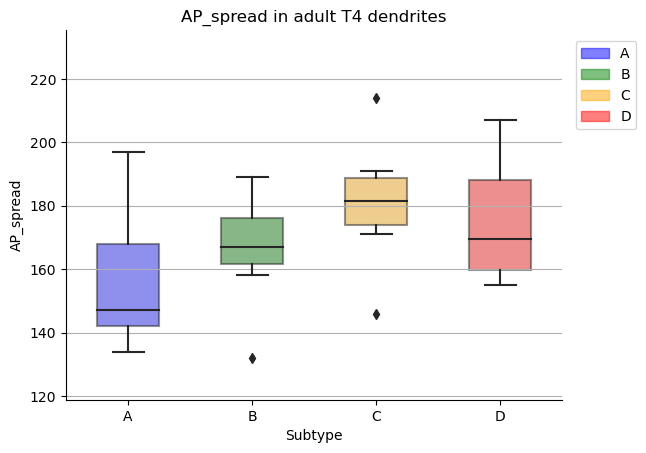

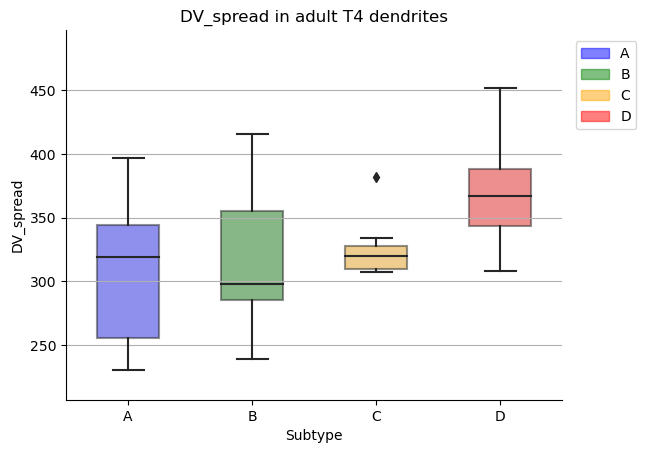

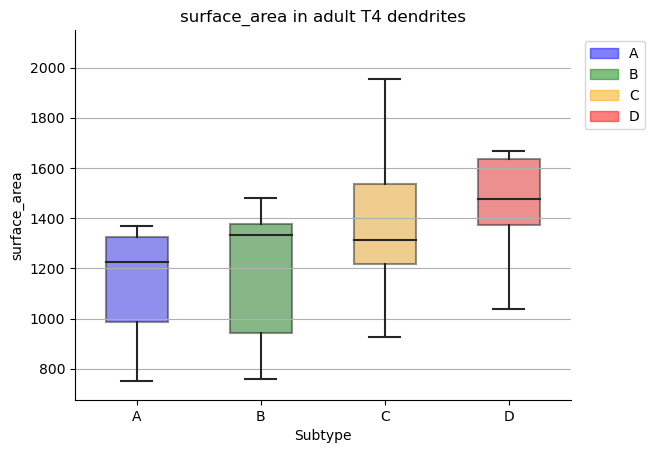

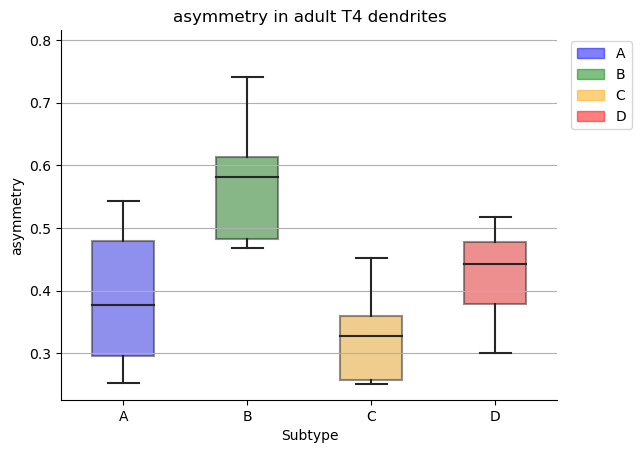

In [7]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

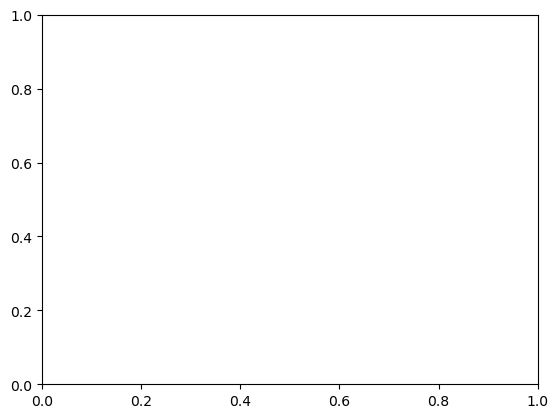

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

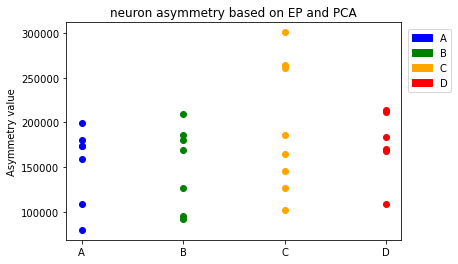

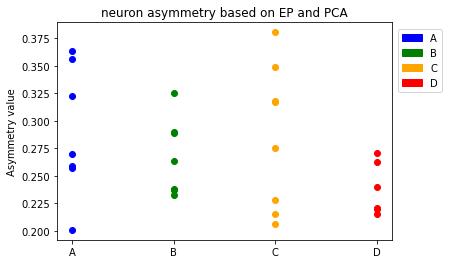

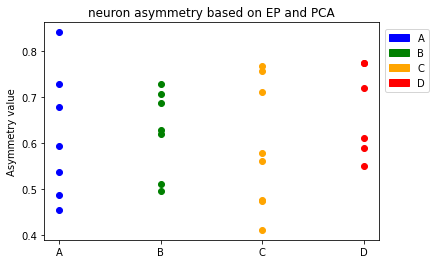

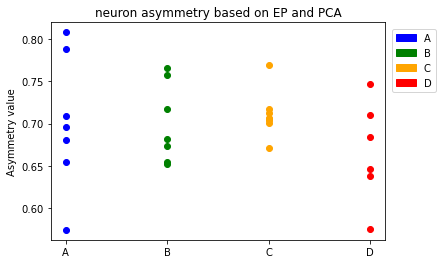

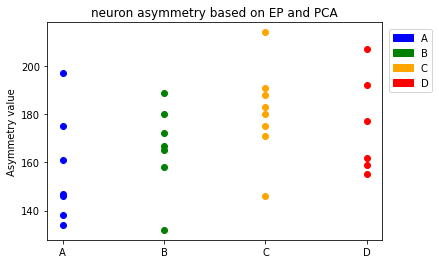

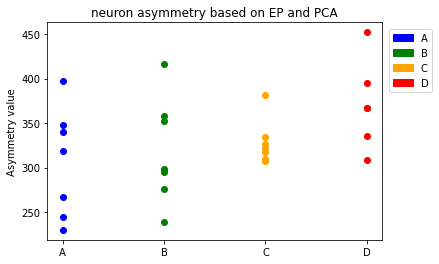

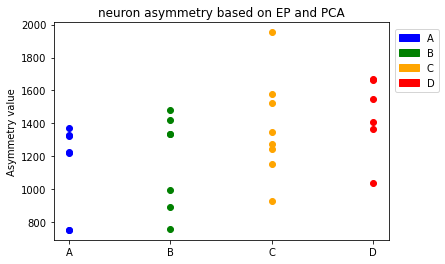

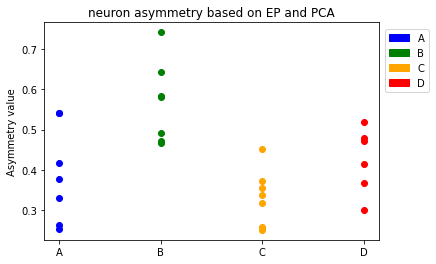

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


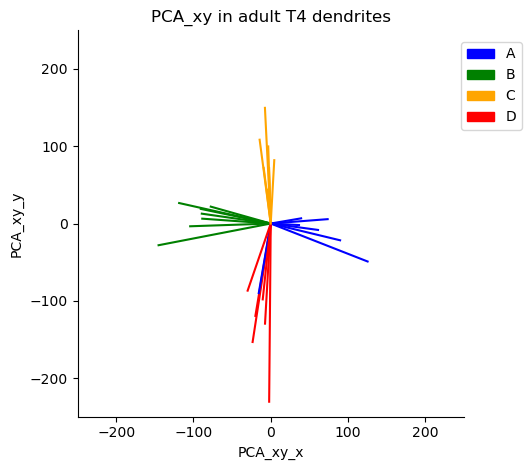

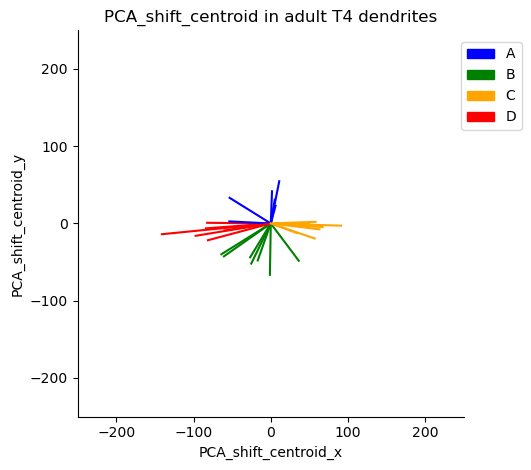

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)